# Drug Decision Tree

With a background rooted in medicine—particularly in predictive modeling for conditions like Acute Promyelocytic Leukemia (APL)—I've always been interested in how data can support treatment decisions. While my prior work focused on real-world oncology datasets, this project uses a public dataset from Kaggle (https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees) as a proxy to demonstrate decision tree modeling for drug classification.

In this notebook, I build an interpretable classification model using decision trees with tuned hyperparameters. The objective is to predict appropriate drug treatment based on patient features such as age, blood pressure, cholesterol levels, and sodium-to-potassium ratios.

This project is intended to showcase my technical skills, not replicate clinical workflows. In a real-world healthcare application, my approach would adapt based on the problem context, data constraints, and domain expertise.

## Setting Data and Data Preparation

In this section, we load the drug treatment dataset and prepare it for modeling. The dataset includes patient attributes such as:

+ Age

+ Sex

+ Blood Pressure (BP)

+ Cholesterol

+ Sodium-to-Potassium Ratio

These features are used to classify which of five drugs (Drug A, B, C, X, or Y) a patient is most likely to be prescribed.

To ensure the model performs well, we:

+ Import the dataset using pandas

+ Encode categorical variables using LabelEncoder

+ Split the dataset into training and testing sets

+ Scale the features for better model performance and convergence

This preprocessing stage helps create a clean, normalized input space—crucial for interpretable and accurate decision tree construction.

In [ ]:
import pandas as pd
drug = pd.read_csv('/content/drive/MyDrive/Colab/ABCD_Drugs/drug200.csv')
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
drug.info()
drug.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
cat_col = [col for col in drug.columns if drug[col].dtype == 'O']
drug_categorical = drug[cat_col]
drug_categorical.head()

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,drugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,drugY


In [ ]:
from sklearn.preprocessing import LabelEncoder

Label_Encoded = LabelEncoder()

In [ ]:
for col in cat_col:
    drug_categorical[col] = Label_Encoded.fit_transform(drug_categorical[col])

drug_categorical.head()

<ipython-input-26-a0c07f4420f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_categorical[col] = Label_Encoded.fit_transform(drug_categorical[col])
<ipython-input-26-a0c07f4420f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_categorical[col] = Label_Encoded.fit_transform(drug_categorical[col])
<ipython-input-26-a0c07f4420f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Sex,BP,Cholesterol,Drug
0,0,0,0,4
1,1,1,0,2
2,1,1,0,2
3,0,2,0,3
4,0,1,0,4


In [ ]:
drug.drop(cat_col,axis=1,inplace=True)

drug_data_cleaned = pd.concat([drug,drug_categorical],axis=1)

drug_data_cleaned.tail()

,Age,Na_to_K,Sex,BP,Cholesterol,Drug
195,56,11.567,0,1,0,2
196,16,12.006,1,1,0,2
197,52,9.894,1,2,0,3
198,23,14.020,1,2,1,3
199,40,11.349,0,1,1,3


In [ ]:
drug_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Na_to_K      200 non-null    float64 
 2   Sex          200 non-null    int64   
 3   BP           200 non-null    int64   
 4   Cholesterol  200 non-null    int64   
 5   Drug         200 non-null    category
dtypes: category(1), float64(1), int64(4)
memory usage: 8.3 KB


In [ ]:
drug_data_cleaned['Drug'] = drug_data_cleaned['Drug'].astype('category')

## Establishing the Model

In this step, we construct our baseline decision tree classifier to predict drug type based on patient attributes.

- **Data Splitting:** We divide the cleaned dataset into training and testing sets using an 80/20 split. This allows us to train the model on one portion of the data and validate its performance on unseen examples.

- **Model Selection:** We use DecisionTreeClassifier from scikit-learn for its simplicity and interpretability—ideal for showcasing rule-based decision logic, especially in medical or regulated settings.

- **Max Depth = 5:** The tree’s depth controls its complexity. A depth of 5 strikes a balance:
  - Deep enough to learn meaningful patterns across multiple conditions (e.g., age, blood pressure, cholesterol).
  - Shallow enough to avoid **overfitting**, which can occur with deeper trees (e.g., depth 10).
  - More interpretable than a very shallow tree (e.g., depth 2), which may be too simple to capture real-world variability.

This baseline model serves as a starting point for future tuning and comparison with more complex models.


In [ ]:
from sklearn.model_selection import train_test_split

X = drug_data_cleaned.drop(columns = ['Drug'])
y = drug_data_cleaned['Drug']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 5), (40, 5), (160,), (40,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_default = DecisionTreeClassifier(max_depth=5)
model_DT = DT_default.fit(X_train,y_train)
model_DT

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred_test_default = model_DT.predict(X_test)

## Initial Model Evaluation

In this section, we assess the performance of our baseline decision tree model using standard evaluation metrics.

### What We're Doing:
- **Classification Report:** Outputs key performance metrics—**precision**, **recall**, **F1-score**, and **support**—for each drug class. This gives insight into how well the model is predicting each category.
- **Confusion Matrix:** Shows how often the model is correctly vs. incorrectly predicting drug classes. Useful for spotting class-specific errors.
- **Accuracy Score:** Provides an overall percentage of correct predictions.
- **Visualization:** We plot the confusion matrix as a heatmap to visually interpret the model's strengths and weaknesses.

### Why This Matters:


These metrics give a first look at how well our model performs with the default settings and current hyperparameters (e.g., `max_depth=5`). While accuracy is important, reviewing precision and recall helps us understand trade-offs in false positives vs. false negatives—especially critical in medical applications.

This step sets the benchmark for future tuning and model comparisons.


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [ ]:
print(classification_report(y_test,y_pred_test_default))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      0.93      0.96        14
           4       0.94      1.00      0.97        15

    accuracy                           0.97        40
   macro avg       0.99      0.99      0.99        40
weighted avg       0.98      0.97      0.97        40



In [ ]:
print(f' Confusion_Matrix: \n {confusion_matrix(y_test,y_pred_test_default)}','\n')

print(f' Accuracy_Score:\n {accuracy_score(y_test,y_pred_test_default)}')

 Confusion_Matrix: 
 [[ 4  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 13  1]
 [ 0  0  0  0 15]] 

 Accuracy_Score:
 0.975


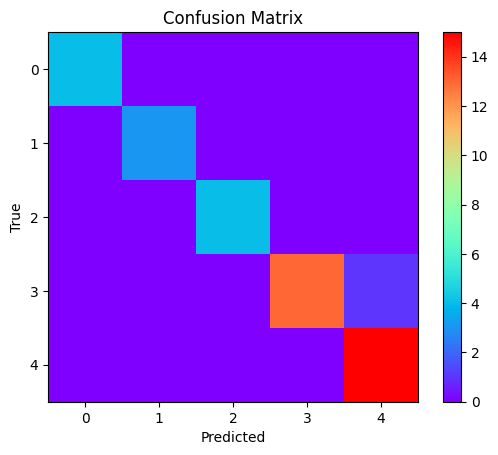

In [ ]:
y_pred = model_DT.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='rainbow')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Interpreting the Decision Tree Structure

In this section, we examine the **learned structure** of our decision tree model. This tree is built using a `max_depth=5`, which helps prevent overfitting by limiting how specific the tree can become to the training data.

### What the Tree Represents:
Each node in the tree represents a decision rule based on one of the features (e.g., age, blood pressure, cholesterol level). The tree splits the data based on these rules to classify patients into one of five drug categories.


### Why This Matters:
This tree shows **how the model is learning from the data** and **how it arrives at its final prediction**. Decision trees are highly interpretable, making them ideal for domains like healthcare, where understanding **why** a decision was made is just as important as the decision itself.

Each path from the root to a leaf node defines a set of rules for predicting a specific drug class. This transparency makes it easy to audit and improve the model, and ensures that decisions align with clinical logic.



In [ ]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

plt.figure(figsize=(250,100))
plot_tree(model_DT,filled=True)
plt.show()

In [ ]:
text_representation = export_text(model_DT)
print(text_representation)

|--- feature_1 <= 14.63
|   |--- feature_3 <= 0.50
|   |   |--- feature_0 <= 50.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  50.50
|   |   |   |--- class: 1
|   |--- feature_3 >  0.50
|   |   |--- feature_3 <= 1.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- class: 3
|   |   |--- feature_3 >  1.50
|   |   |   |--- class: 3
|--- feature_1 >  14.63
|   |--- class: 4



### Hyperparameter Tuning

Although the dataset used here is relatively small — and the performance differences between hyperparameter settings may be minimal — practicing robust model tuning is essential in real-world applications. In my professional work, particularly in clinical modeling and credit scoring, hyperparameter tuning is a vital step for ensuring model generalizability and stability.

To demonstrate this rigor, we'll explore **three common tuning approaches**:

1. **K-Fold Cross-Validation**  
   Used to evaluate model performance by rotating through training and validation splits. It gives a more stable estimate of model accuracy.

2. **Grid Search**  
   Exhaustively tests all combinations of specified hyperparameter values. While computationally expensive, it guarantees the discovery of the optimal parameter set within the grid.

3. **Random Search**  
   Samples a fixed number of parameter combinations from a defined range. It's often faster than Grid Search and works well when only a few hyperparameters significantly impact performance.

By incorporating these methods, we demonstrate not just our understanding of the mechanics of decision trees, but our commitment to robust and scalable modeling practices.


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 10
parameters = {'max_depth':range(1,20)}

dtree = DecisionTreeClassifier(criterion='gini')

GScv = GridSearchCV(estimator=dtree, param_grid=parameters, scoring='accuracy',
                    cv=n_folds, return_train_score=True)

GScv.fit(X_train,y_train)

scores_GScv = GScv.cv_results_

scores_GScv_df = pd.DataFrame(scores_GScv)
scores_GScv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004615,0.002532,0.004596,0.002368,1,{'max_depth': 1},0.6875,0.6875,0.7500,0.7500,...,0.722222,0.722222,0.722222,0.722222,0.722222,0.722222,0.729167,0.729167,0.725000,0.003402
1,0.004445,0.001956,0.003029,0.000537,2,{'max_depth': 2},0.8125,0.8125,0.8750,0.8750,...,0.840278,0.840278,0.840278,0.840278,0.840278,0.840278,0.847222,0.854167,0.843750,0.004658
2,0.005589,0.004518,0.003662,0.001811,3,{'max_depth': 3},0.8750,0.8750,0.9375,0.9375,...,0.923611,0.923611,0.923611,0.923611,0.923611,0.923611,0.937500,0.930556,0.925694,0.004447
3,0.005991,0.005096,0.004230,0.003091,4,{'max_depth': 4},1.0000,1.0000,1.0000,1.0000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.008980,0.002846,0.009031,0.005303,5,{'max_depth': 5},1.0000,1.0000,1.0000,1.0000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [ ]:
scores_GScv_df_scores = scores_GScv_df[['params','mean_train_score','mean_test_score']]
scores_GScv_df_scores.head()

,params,mean_train_score,mean_test_score
0,{'max_depth': 1},0.725000,0.72500
1,{'max_depth': 2},0.843750,0.84375
2,{'max_depth': 3},0.925694,0.88750
3,{'max_depth': 4},1.000000,0.99375
4,{'max_depth': 5},1.000000,0.99375


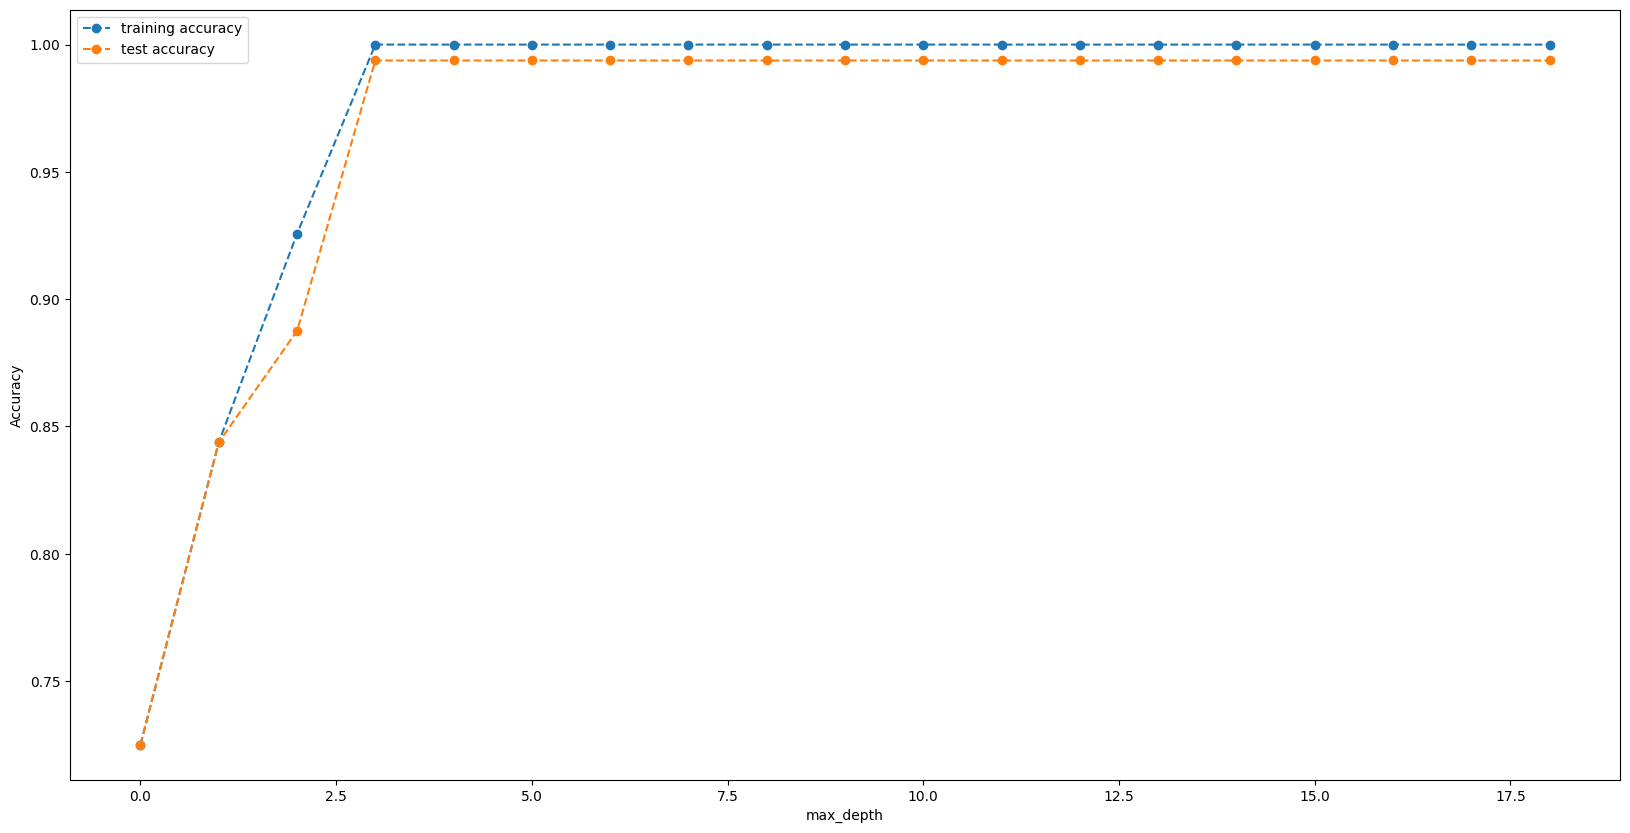

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(scores_GScv_df['mean_train_score'],label="training accuracy",marker='o',linestyle='dashed')
plt.plot(scores_GScv_df['mean_test_score'],label="test accuracy",marker='o',linestyle='dashed')

plt.legend(loc="upper left", prop={'size':10})
plt.xlabel("max_depth", size=10)
plt.ylabel("Accuracy", size=10)

plt.show()

In [ ]:
n_folds = 10
parameters = {'min_samples_leaf':range(5,200,20)}
dtree = DecisionTreeClassifier(criterion='gini')

GScv = GridSearchCV(estimator=dtree,param_grid=parameters,
                    scoring='accuracy',cv=n_folds,return_train_score=True)

GScv.fit(X_train,y_train)

scores_GScv = GScv.cv_results_

scores_GScv_df = pd.DataFrame(scores_GScv)
scores_GScv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002576,0.000801,0.001869,0.000245,5,{'min_samples_leaf': 5},1.0000,1.0000,1.000,1.0000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.002179,0.000228,0.001732,0.000059,7,{'min_samples_leaf': 7},1.0000,1.0000,1.000,1.0000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.002554,0.000853,0.023334,0.064352,9,{'min_samples_leaf': 9},1.0000,1.0000,1.000,1.0000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.002593,0.001092,0.001699,0.000028,11,{'min_samples_leaf': 11},1.0000,1.0000,1.000,1.0000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.937500,0.937500,0.987500,0.025000
4,0.002074,0.000120,0.001765,0.000203,13,{'min_samples_leaf': 13},0.8125,0.8125,0.875,0.9375,...,0.909722,0.916667,0.916667,0.916667,0.916667,0.916667,0.930556,0.909722,0.914583,0.006979


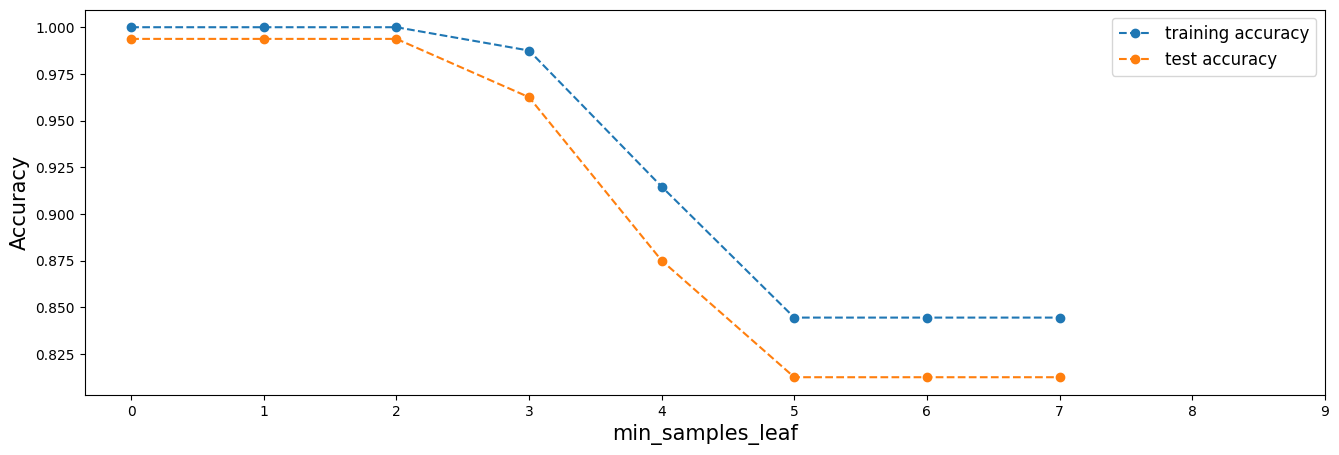

In [ ]:
plt.figure(figsize=(16,5))

plt.plot(scores_GScv_df['mean_train_score'],label="training accuracy",marker='o',linestyle='dashed')
plt.plot(scores_GScv_df['mean_test_score'],label="test accuracy",marker='o',linestyle='dashed')

plt.legend(loc="best", prop={'size':12}) # loc = best,upper right,upper left,lower left,lower right,right,center left,center right,lower center,upper center,center
plt.xlabel("min_samples_leaf", size=15)
plt.ylabel("Accuracy", size=15)
plt.xticks(range(0,10,1))

plt.show()

In [ ]:
n_folds = 10
parameters = {"min_samples_split":range(5,200,20)}

dtree = DecisionTreeClassifier(criterion='gini')

GScv = GridSearchCV(dtree,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)

GScv.fit(X_train,y_train)

scores_GScv = GScv.cv_results_

scores_GScv_df = pd.DataFrame(scores_GScv)
scores_GScv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004098,0.001983,0.003065,0.000474,5,{'min_samples_split': 5},1.0000,1.0000,1.0000,1.0000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.003569,0.000453,0.002940,0.000135,25,{'min_samples_split': 25},0.8750,0.8750,0.9375,0.9375,...,0.923611,0.923611,0.923611,0.923611,0.923611,0.923611,0.937500,0.930556,0.925694,0.004447
2,0.003485,0.000144,0.003007,0.000365,45,{'min_samples_split': 45},0.7500,0.7500,0.8750,0.8750,...,0.840278,0.840278,0.840278,0.840278,0.840278,0.840278,0.854167,0.854167,0.844444,0.005556
3,0.002656,0.000699,0.002120,0.000518,65,{'min_samples_split': 65},0.8125,0.8125,0.8750,0.8750,...,0.840278,0.840278,0.840278,0.840278,0.840278,0.840278,0.847222,0.854167,0.843750,0.004658
4,0.002054,0.000156,0.001682,0.000033,85,{'min_samples_split': 85},0.6875,0.6875,0.7500,0.7500,...,0.722222,0.722222,0.722222,0.722222,0.722222,0.722222,0.729167,0.729167,0.725000,0.003402


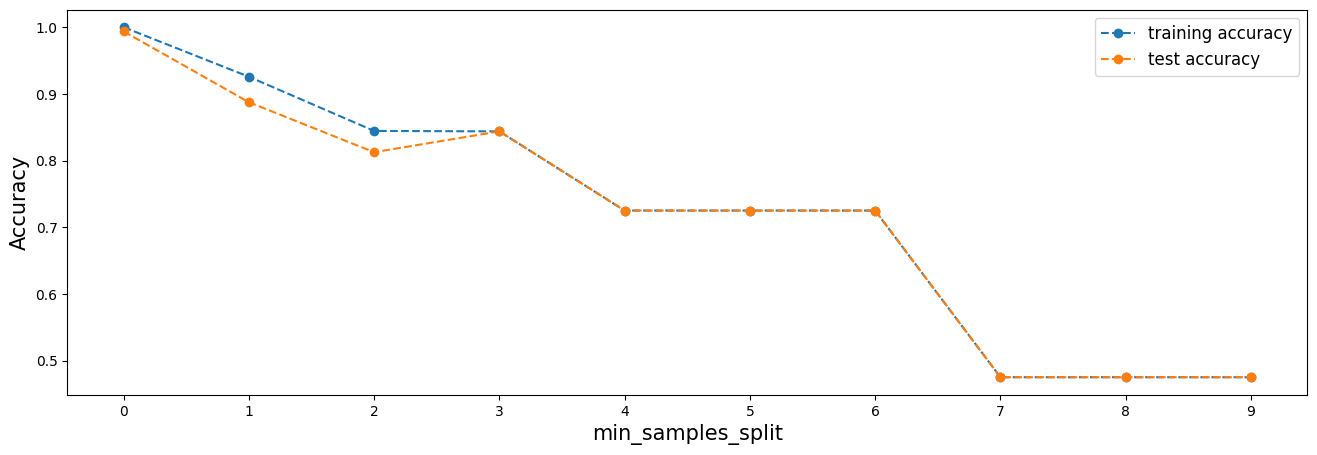

In [ ]:
plt.figure(figsize=(16,5))

plt.plot(scores_GScv_df['mean_train_score'],label="training accuracy",marker='o',linestyle='dashed')
plt.plot(scores_GScv_df['mean_test_score'],label="test accuracy",marker='o',linestyle='dashed')

plt.legend(loc="best", prop={'size':12})
plt.xlabel("min_samples_split",size=15)
plt.ylabel("Accuracy",size=15)
plt.xticks(range(0,10,1))

plt.show()

In [ ]:
n_folds = 10

param_grid = {
    'max_depth': range(5,15,5),
    'min_samples_leaf': range(50,150,50),
    'min_samples_split': range(50,150,50),
    'criterion': ["entropy","gini"]}

dtree = DecisionTreeClassifier()


grid_search = GridSearchCV(estimator=dtree,param_grid=param_grid,cv=n_folds,verbose=1)

grid_search.fit(X_train,y_train)

cv_results = grid_search.cv_results_

cv_results_df =  pd.DataFrame(cv_results)
cv_results_df.head()

Fitting 10 folds for each of 16 candidates, totalling 160 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004672,0.002801,0.003503,0.000670,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.6875,...,0.75,0.75,0.75,0.75,0.75,0.6875,0.6875,0.725,0.030619,1
1,0.004054,0.001729,0.003987,0.002990,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.6875,...,0.75,0.75,0.75,0.75,0.75,0.6875,0.6875,0.725,0.030619,1
2,0.024199,0.058562,0.005327,0.003255,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.4375,...,0.50,0.50,0.50,0.50,0.50,0.4375,0.4375,0.475,0.030619,9
3,0.005829,0.005871,0.003472,0.001001,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.4375,...,0.50,0.50,0.50,0.50,0.50,0.4375,0.4375,0.475,0.030619,9
4,0.013356,0.009245,0.009677,0.006934,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.6875,...,0.75,0.75,0.75,0.75,0.75,0.6875,0.6875,0.725,0.030619,1


In [ ]:
print(f' Best Accuracy you can get:\n {grid_search.best_score_}\n','***'*15)

print(f' Best Hyperparameters Parameters & there Values: \n{grid_search.best_params_}')

 Best Accuracy you can get:
 0.725
 *********************************************
 Best Hyperparameters Parameters & there Values: 
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [ ]:
dt_with_optimal_hyperparameters = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=50,
                                                         min_samples_split=50,random_state=108)


model_dt = dt_with_optimal_hyperparameters.fit(X_train,y_train)
model_dt

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50, random_state=108)

In [ ]:
from sklearn import metrics

y_pred_test = model_dt.predict(X_test)
metrics.accuracy_score(y_test,y_pred_test)

0.7

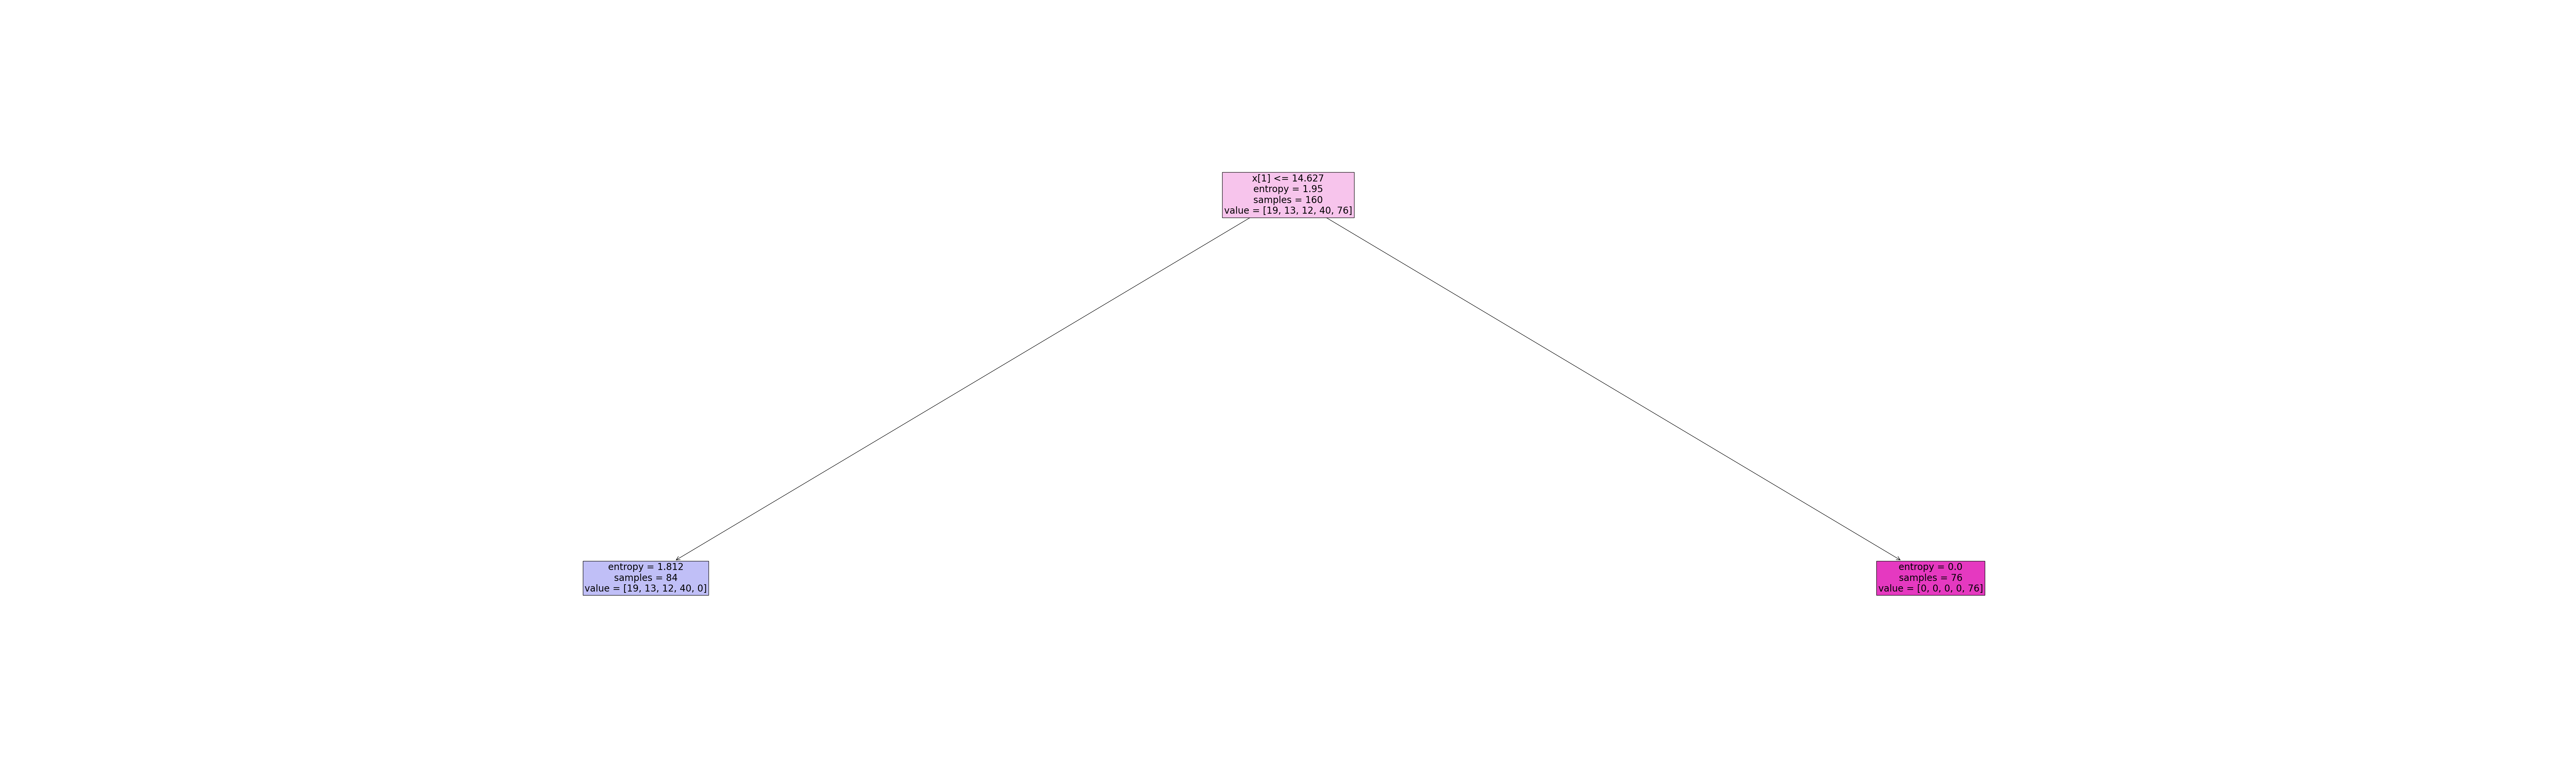

In [ ]:
fig = plt.figure(figsize=(100,30))
plot_tree(model_dt,filled=True,fontsize=20)
plt.show()

In [ ]:
print(export_text(model_dt))


|--- feature_1 <= 14.63
|   |--- class: 3
|--- feature_1 >  14.63
|   |--- class: 4



## Adjusting max_depth for Model Simplicity

In this step, we retrain the decision tree using more conservative settings to prioritize **simplicity** and **interpretability** over complexity.

We set:
- max_depth = 3 : Limits how deep the tree can grow, ensuring decisions are made with fewer splits and simpler logic paths.
- min_samples_leaf = 50 and min_samples_split = 50: Prevent the model from overfitting small sample groups, improving generalization.

While this doesn’t guarantee the highest possible accuracy, it creates a more **stable and understandable** model — a crucial factor when making data-driven recommendations in sensitive fields like healthcare or finance.

We then reassess performance on the test set to ensure the model remains viable under these adjusted parameters.


In [ ]:
dt_with_max_depth_optimal_hyperparameters =  DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=50,
                                                                    min_samples_split=50)
model_dt = dt_with_max_depth_optimal_hyperparameters.fit(X_train,y_train)

y_pred_test = model_dt.predict(X_test)
metrics.accuracy_score(y_test,y_pred_test)

0.7

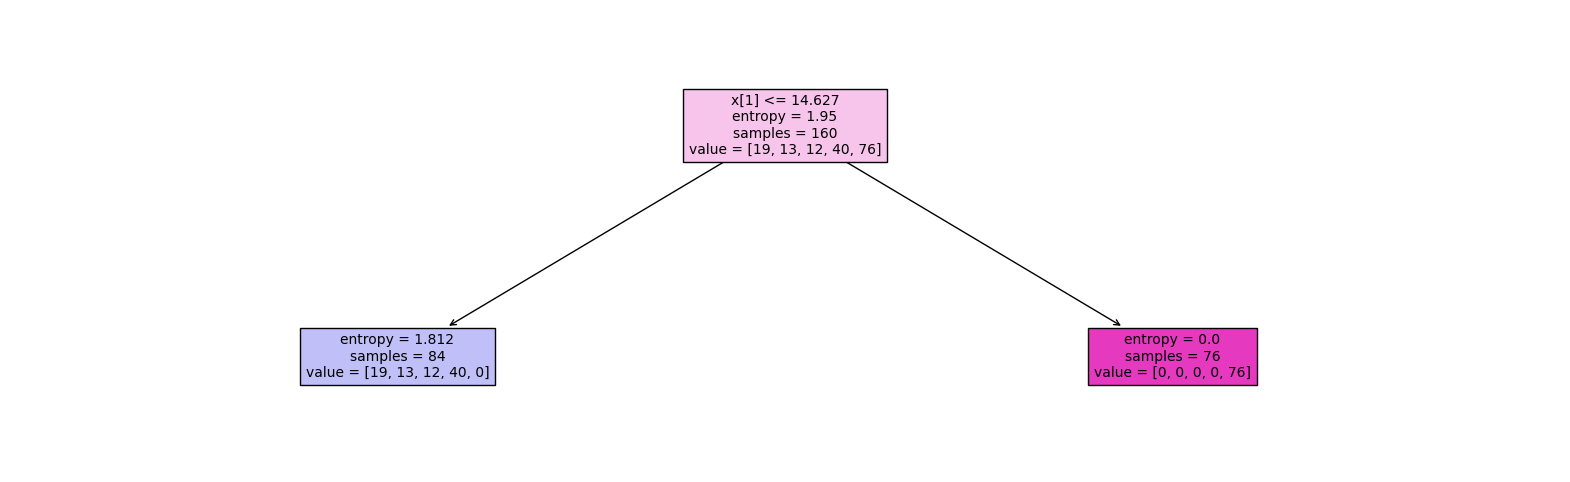

In [ ]:
plt.figure(figsize=(20,6))

plot_tree(model_dt,filled=True,fontsize=10)

plt.show()

In [ ]:
print(export_text(model_dt))


|--- feature_1 <= 14.63
|   |--- class: 3
|--- feature_1 >  14.63
|   |--- class: 4



In [ ]:
print(metrics.classification_report(y_test,y_pred_test))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.54      0.93      0.68        14
           4       0.94      1.00      0.97        15

    accuracy                           0.70        40
   macro avg       0.30      0.39      0.33        40
weighted avg       0.54      0.70      0.60        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 0  0  0  4  0]
 [ 0  0  0  3  0]
 [ 0  0  0  4  0]
 [ 0  0  0 13  1]
 [ 0  0  0  0 15]] 
 ******************************


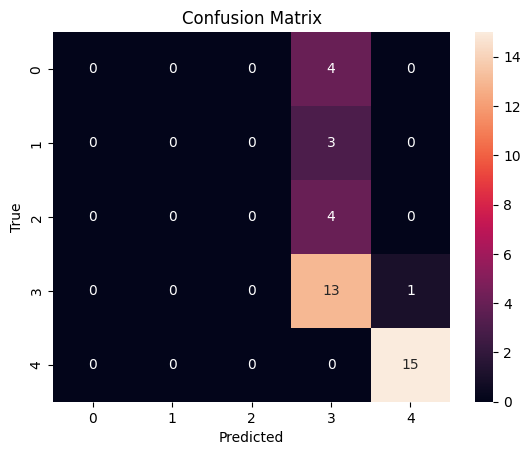

In [ ]:
print(metrics.confusion_matrix(y_test,y_pred_test),'\n','***'*10)

import matplotlib.pyplot as plt
import seaborn as sns

confusion_mat = metrics.confusion_matrix(y_test, y_pred_test)

sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Observe above model is not much better than default model

Still its fine not that bad. Atleast now tree is not much complex to understand

### 🌳 Decision Tree Pruning

In this section, we apply **Cost Complexity Pruning**, a post-training technique that trims branches of the decision tree that provide minimal predictive power.

**Why prune?**
- To reduce overfitting by eliminating branches that may capture noise in the training data.
- To simplify the model and improve generalization to unseen data.

**How it works:**
- The pruning path is generated using cost_complexity_pruning_path(), which provides a list of effective alpha values (ccp_alphas) and corresponding impurities.
- Each alpha represents a different level of pruning — higher alphas yield simpler trees.
- We loop through these alphas to train and evaluate multiple pruned trees.

**Key steps:**
- Plot training vs test accuracy across different alpha values.
- Identify the alpha that balances simplicity with accuracy.
- Visualize the final pruned tree for interpretability.

This method provides an elegant and data-driven way to improve model robustness while keeping complexity under control.


In [ ]:
model_dt


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=50,
                       min_samples_split=50)

In [ ]:
pruning_path = model_dt.cost_complexity_pruning_path(X_train,y_train)

alphas, impurities = pruning_path.ccp_alphas,pruning_path.impurities

In [ ]:
alphas

array([0.        , 0.99819588])

In [ ]:
impurities

array([0.95151032, 1.9497062 ])

In [ ]:
train_accuracy, test_accuracy = [],[]

for ccp_alpha in alphas:
    dt_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha,random_state=108)
    dt_clf.fit(X_train,y_train)

    y_pred_train= dt_clf.predict(X_train)
    y_pred_test= dt_clf.predict(X_test)

    train_accu = metrics.accuracy_score(y_pred_train,y_train)
    train_accuracy.append(train_accu)

    test_accu = metrics.accuracy_score(y_pred_test,y_test)
    test_accuracy.append(test_accu)

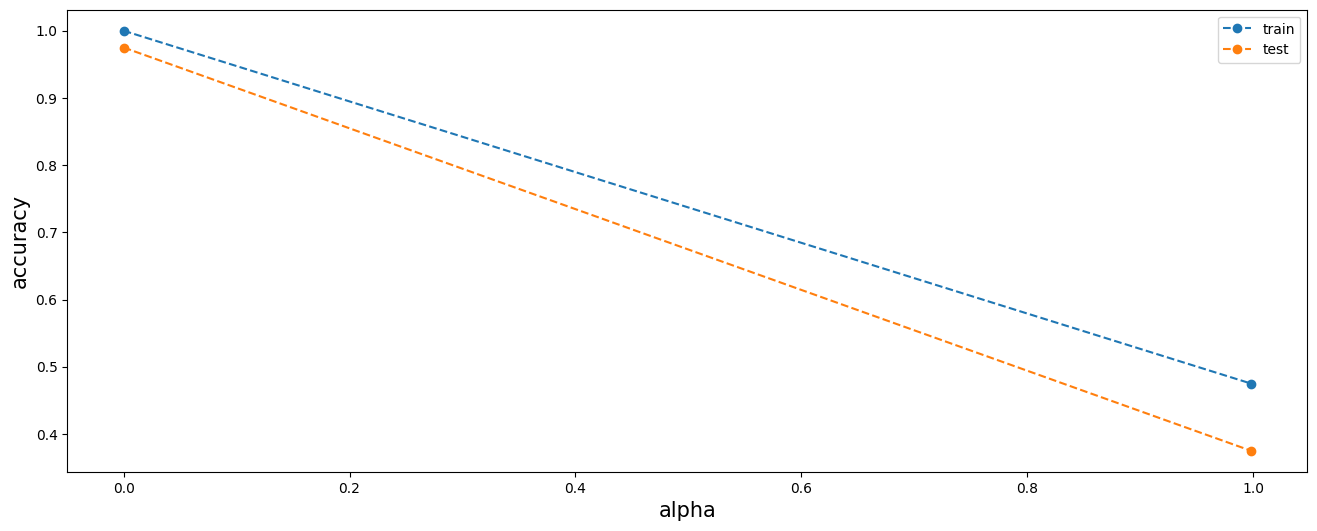

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(alphas,train_accuracy,label='train',marker='o',linestyle='dashed')
plt.plot(alphas,test_accuracy,label='test',marker='o',linestyle='dashed')

plt.legend(loc="best",prop={'size':10})
plt.xlabel('alpha',size=15)
plt.ylabel('accuracy',size=15)

plt.show()

In [ ]:
final_dt_clf = DecisionTreeClassifier(ccp_alpha=0.01,random_state=108)

final_model = final_dt_clf.fit(X_train,y_train)

y_pred_train = final_model.predict(X_train)

y_pred_test = final_model.predict(X_test)

final_train_accuracy = metrics.accuracy_score(y_pred_train,y_train)
final_test_accuracy = metrics.accuracy_score(y_pred_test,y_test)

print(f' Final_train_accuracy\n {final_train_accuracy}','\n','***'*6)
print(f' Final_test_accuracy\n {final_test_accuracy}')

 Final_train_accuracy
 1.0 
 ******************
 Final_test_accuracy
 0.975


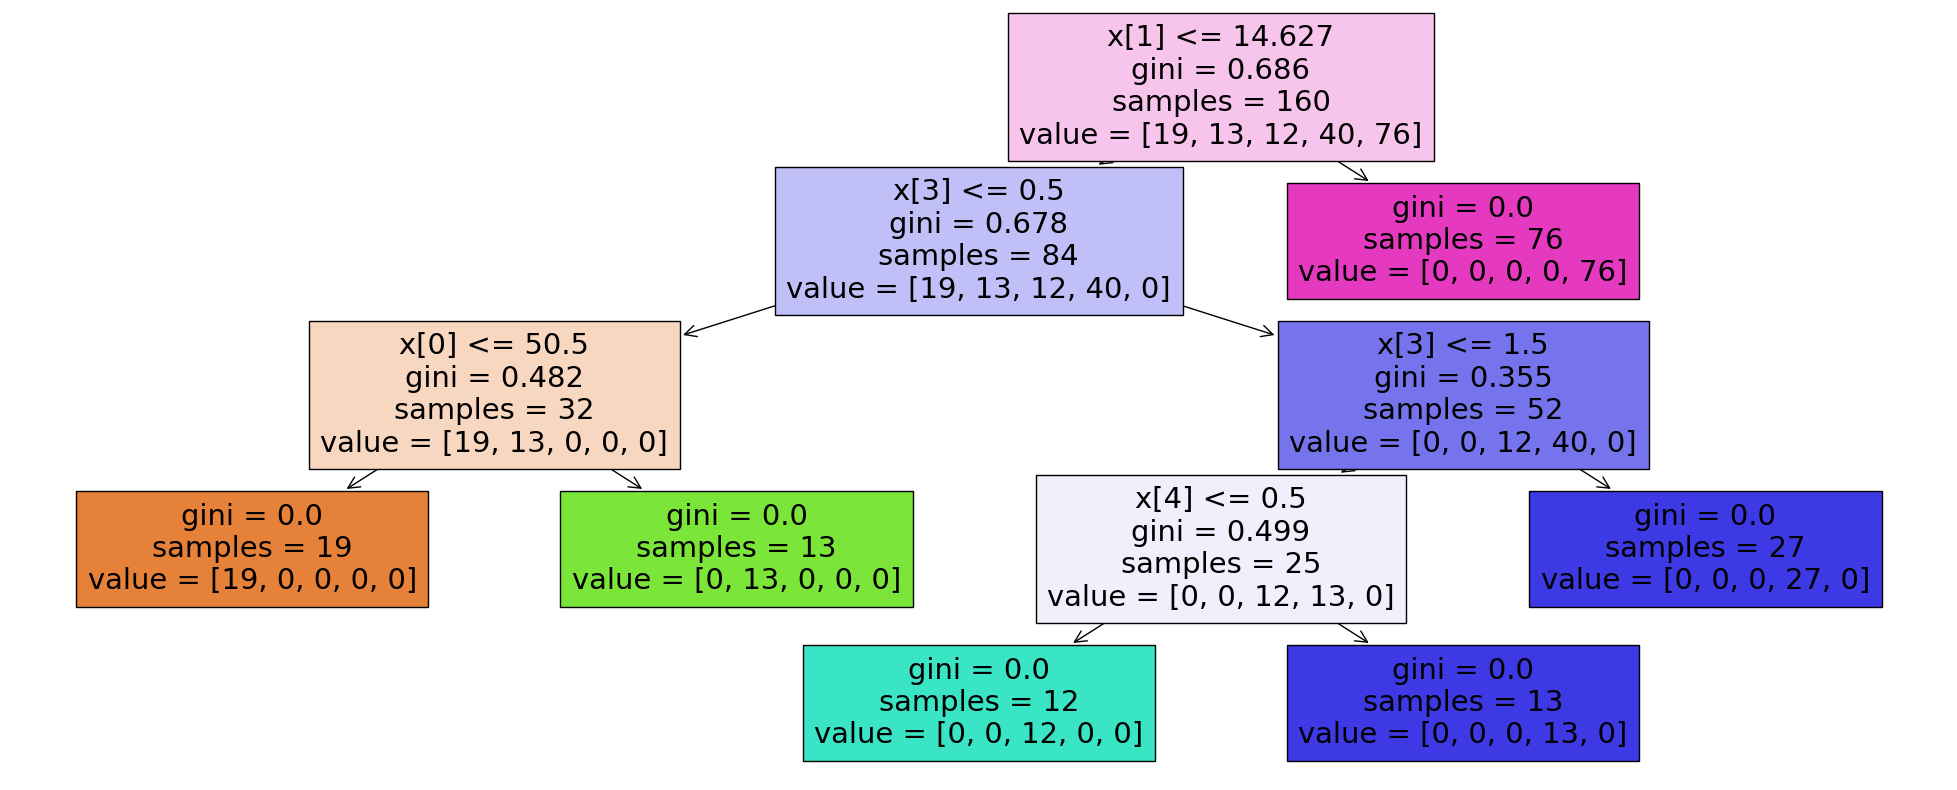

In [ ]:
plt.figure(figsize=(25,10))

plot_tree(final_model,filled=True)

plt.show()

In [ ]:
print(export_text(model_dt))


|--- feature_1 <= 14.63
|   |--- class: 3
|--- feature_1 >  14.63
|   |--- class: 4



## Next Steps

This project was designed to showcase my practical decision tree modeling skills within a healthcare-inspired context. However, there are several areas that could enhance both performance and complexity management in future iterations:

- **Ensemble Methods:** Incorporate Random Forest or Gradient Boosting to improve classification robustness and reduce variance.
- **Feature Engineering:** Explore polynomial or interaction terms and domain-specific feature grouping to improve model learning.
- **Model Explainability:** Use tools like SHAP or LIME to provide interpretable insights for non-technical healthcare stakeholders.
- **Model Deployment:** Package the model into an API using Flask or FastAPI to simulate integration with clinical decision-support tools.
- **Larger Dataset Application:** Apply this workflow to real-world EMR data or larger pharmacological datasets for higher fidelity modeling.

These steps would extend the current proof-of-concept into a scalable, production-ready classification tool.
